<a href="https://colab.research.google.com/github/shoaibimt/CancerAI/blob/main/file_2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-12-20 11:19:34--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   120MB/s    in 0.7s    

2022-12-20 11:19:35 (120 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

# All requested packages already installed.

installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import mannwhitneyu
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path = ('/content/drive/MyDrive/inhibitor_prediction/bcr_abl/chembl_data_retrieve/bcr_abl_bioactivity_data_raw.csv')

In [ ]:
df_raw =pd.read_csv(path)

In [ ]:
df_raw

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,1675266,[],CHEMBL867071,Antiproliferative activity against human BCR-A...,F,NaN,NaN,BAO_0000190,BAO_0000219,...,Homo sapiens,Bcr/Abl fusion protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,9.5000
1,Not Determined,1675350,[],CHEMBL867071,Antiproliferative activity against human BCR-A...,F,NaN,NaN,BAO_0000190,BAO_0000219,...,Homo sapiens,Bcr/Abl fusion protein,9606,NaN,NaN,IC50,NaN,NaN,NaN,NaN
2,NaN,1675351,[],CHEMBL867071,Antiproliferative activity against human BCR-A...,F,NaN,NaN,BAO_0000190,BAO_0000219,...,Homo sapiens,Bcr/Abl fusion protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,14.6000
3,NaN,1675352,[],CHEMBL867071,Antiproliferative activity against human BCR-A...,F,NaN,NaN,BAO_0000190,BAO_0000219,...,Homo sapiens,Bcr/Abl fusion protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,12.9000
4,NaN,1675353,[],CHEMBL867071,Antiproliferative activity against human BCR-A...,F,NaN,NaN,BAO_0000190,BAO_0000219,...,Homo sapiens,Bcr/Abl fusion protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,3.8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,NaN,22989344,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4774928,Inhibition of BCR-ABL T315I mutant (unknown or...,B,P00519,T315I,BAO_0000179,BAO_0000224,...,Homo sapiens,Bcr/Abl fusion protein,9606,NaN,NaN,IC50,uM,NaN,NaN,2.5100
679,NaN,22989345,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4774928,Inhibition of BCR-ABL T315I mutant (unknown or...,B,P00519,T315I,BAO_0000179,BAO_0000224,...,Homo sapiens,Bcr/Abl fusion protein,9606,NaN,NaN,IC50,uM,NaN,NaN,1.4200
680,NaN,22989346,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4774928,Inhibition of BCR-ABL T315I mutant (unknown or...,B,P00519,T315I,BAO_0000179,BAO_0000224,...,Homo sapiens,Bcr/Abl fusion protein,9606,NaN,NaN,IC50,uM,NaN,NaN,1.6050
681,NaN,22989347,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4774928,Inhibition of BCR-ABL T315I mutant (unknown or...,B,P00519,T315I,BAO_0000179,BAO_0000224,...,Homo sapiens,Bcr/Abl fusion protein,9606,NaN,NaN,IC50,uM,NaN,NaN,100.0000


In [ ]:
df_raw.shape

(683, 45)

In [ ]:
df_raw.describe()

,activity_id,document_year,pchembl_value,potential_duplicate,record_id,src_id,standard_flag,standard_text_value,standard_upper_value,standard_value,target_tax_id,text_value,toid,upper_value,value
count,6.830000e+02,683.000000,515.000000,683.0,6.830000e+02,683.000000,683.000000,0.0,0.0,6.540000e+02,683.0,0.0,0.0,6.000000,654.000000
mean,1.454513e+07,2014.638360,6.421320,0.0,2.351201e+06,1.162518,0.957540,NaN,NaN,2.976115e+04,9606.0,NaN,NaN,1802.500000,672.363804
std,5.491731e+06,3.501921,1.325328,0.0,8.234287e+05,2.448580,0.201783,NaN,NaN,1.316735e+05,0.0,NaN,NaN,3990.327581,2205.095533
min,1.675266e+06,2004.000000,4.000000,0.0,4.222950e+05,1.000000,0.000000,NaN,NaN,1.200000e-02,9606.0,NaN,NaN,2.000000,0.000900
25%,1.329295e+07,2013.000000,5.415000,0.0,1.890980e+06,1.000000,1.000000,NaN,NaN,9.475000e+01,9606.0,NaN,NaN,51.500000,1.162000
50%,1.570795e+07,2015.000000,6.300000,0.0,2.500026e+06,1.000000,1.000000,NaN,NaN,1.073500e+03,9606.0,NaN,NaN,259.700000,8.345000
75%,1.820031e+07,2017.000000,7.405000,0.0,3.019406e+06,1.000000,1.000000,NaN,NaN,1.000000e+04,9606.0,NaN,NaN,342.050000,93.877500
max,2.298935e+07,2020.000000,9.480000,0.0,3.570431e+06,38.000000,1.000000,NaN,NaN,2.550000e+06,9606.0,NaN,NaN,9942.000000,10000.000000


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activity_comment           29 non-null     object 
 1   activity_id                683 non-null    int64  
 2   activity_properties        683 non-null    object 
 3   assay_chembl_id            683 non-null    object 
 4   assay_description          683 non-null    object 
 5   assay_type                 683 non-null    object 
 6   assay_variant_accession    98 non-null     object 
 7   assay_variant_mutation     98 non-null     object 
 8   bao_endpoint               683 non-null    object 
 9   bao_format                 683 non-null    object 
 10  bao_label                  683 non-null    object 
 11  canonical_smiles           683 non-null    object 
 12  data_validity_comment      26 non-null     object 
 13  data_validity_description  26 non-null     object 

In [ ]:
df_raw.isnull().sum()

activity_comment             654
activity_id                    0
activity_properties            0
assay_chembl_id                0
assay_description              0
assay_type                     0
assay_variant_accession      585
assay_variant_mutation       585
bao_endpoint                   0
bao_format                     0
bao_label                      0
canonical_smiles               0
data_validity_comment        657
data_validity_description    657
document_chembl_id             0
document_journal               3
document_year                  0
ligand_efficiency            191
molecule_chembl_id             0
molecule_pref_name           601
parent_molecule_chembl_id      0
pchembl_value                168
potential_duplicate            0
qudt_units                    77
record_id                      0
relation                      29
src_id                         0
standard_flag                  0
standard_relation             29
standard_text_value          683
standard_t

In [ ]:
df_raw.duplicated().sum()

0

In [ ]:
df_raw.bao_label.value_counts() # Bioassay ontology

protein format           449
cell-based format        139
assay format              80
single protein format     15
Name: bao_label, dtype: int64

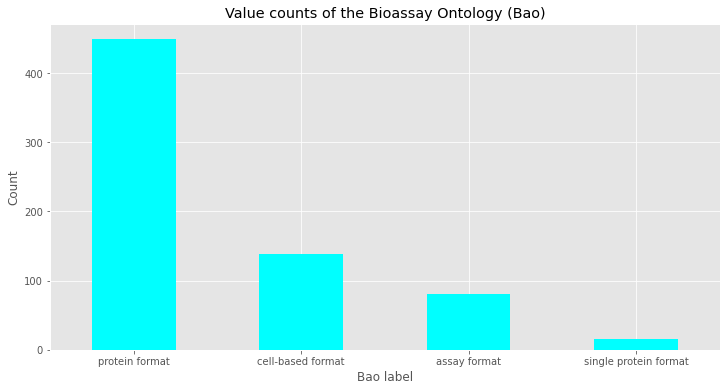

In [ ]:
df_raw.bao_label.value_counts().plot(kind="bar", color ='aqua')
plt.title("Value counts of the Bioassay Ontology (Bao)")
plt.xlabel("Bao label")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [ ]:
df_missing = df_raw.pchembl_value.isnull().sum()

In [ ]:
df_missing

168

In [ ]:
df_nonmissing = df_raw.pchembl_value.notnull().sum()

In [ ]:
df_nonmissing

515

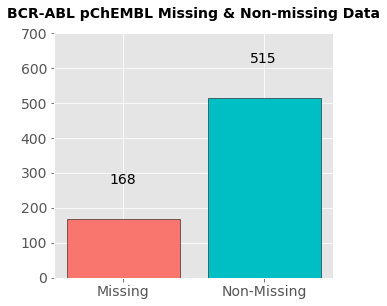

In [ ]:
# Bar plot of Missing vs Non-Missing Data of pCHEMBL values

# Data
missing = df_raw.pchembl_value.isnull().sum()
nonmissing = df_raw.pchembl_value.notnull().sum()

x = ['Missing', 'Non-Missing']
y = [missing, nonmissing]

# Setup plot
fig, ax = plt.subplots()

# Make bar plot
p = ax.bar(x, y, color = ['#F8766D', '#00BFC4'], ec = 'black')

ax.set_title('BCR-ABL pChEMBL Missing & Non-missing Data', fontsize=14, fontweight='bold', pad=15)

ax.set_ylim(0,700)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Label above bar
for index, data in enumerate(y):
    plt.text(x=index-0.1 , y =data+100 , s=f"{data}" , fontdict=dict(fontsize=14))

fig.set_size_inches(5,4.5)
plt.show()

In [ ]:
df_non_miss = df_raw[df_raw.pchembl_value.notnull()]

In [ ]:
df_non_miss.shape

(515, 45)

In [ ]:
df_non_miss

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,1675266,[],CHEMBL867071,Antiproliferative activity against human BCR-A...,F,NaN,NaN,BAO_0000190,BAO_0000219,...,Homo sapiens,Bcr/Abl fusion protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,9.5000
2,NaN,1675351,[],CHEMBL867071,Antiproliferative activity against human BCR-A...,F,NaN,NaN,BAO_0000190,BAO_0000219,...,Homo sapiens,Bcr/Abl fusion protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,14.6000
3,NaN,1675352,[],CHEMBL867071,Antiproliferative activity against human BCR-A...,F,NaN,NaN,BAO_0000190,BAO_0000219,...,Homo sapiens,Bcr/Abl fusion protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,12.9000
4,NaN,1675353,[],CHEMBL867071,Antiproliferative activity against human BCR-A...,F,NaN,NaN,BAO_0000190,BAO_0000219,...,Homo sapiens,Bcr/Abl fusion protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,3.8000
9,NaN,1714080,[],CHEMBL861701,Antiproliferative activity against human K562 ...,F,NaN,NaN,BAO_0000190,BAO_0000219,...,Homo sapiens,Bcr/Abl fusion protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,28.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,NaN,22989343,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4774928,Inhibition of BCR-ABL T315I mutant (unknown or...,B,P00519,T315I,BAO_0000179,BAO_0000224,...,Homo sapiens,Bcr/Abl fusion protein,9606,NaN,NaN,IC50,uM,NaN,NaN,1.6350
678,NaN,22989344,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4774928,Inhibition of BCR-ABL T315I mutant (unknown or...,B,P00519,T315I,BAO_0000179,BAO_0000224,...,Homo sapiens,Bcr/Abl fusion protein,9606,NaN,NaN,IC50,uM,NaN,NaN,2.5100
679,NaN,22989345,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4774928,Inhibition of BCR-ABL T315I mutant (unknown or...,B,P00519,T315I,BAO_0000179,BAO_0000224,...,Homo sapiens,Bcr/Abl fusion protein,9606,NaN,NaN,IC50,uM,NaN,NaN,1.4200
680,NaN,22989346,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4774928,Inhibition of BCR-ABL T315I mutant (unknown or...,B,P00519,T315I,BAO_0000179,BAO_0000224,...,Homo sapiens,Bcr/Abl fusion protein,9606,NaN,NaN,IC50,uM,NaN,NaN,1.6050


In [ ]:
df_non_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 682
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activity_comment           0 non-null      object 
 1   activity_id                515 non-null    int64  
 2   activity_properties        515 non-null    object 
 3   assay_chembl_id            515 non-null    object 
 4   assay_description          515 non-null    object 
 5   assay_type                 515 non-null    object 
 6   assay_variant_accession    77 non-null     object 
 7   assay_variant_mutation     77 non-null     object 
 8   bao_endpoint               515 non-null    object 
 9   bao_format                 515 non-null    object 
 10  bao_label                  515 non-null    object 
 11  canonical_smiles           515 non-null    object 
 12  data_validity_comment      0 non-null      object 
 13  data_validity_description  0 non-null      object 

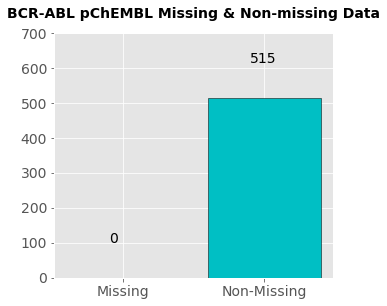

In [ ]:
# Bar plot of Missing vs Non-Missing Data of pCHEMBL values

# Data
missing = df_non_miss.pchembl_value.isnull().sum()
nonmissing = df_non_miss.pchembl_value.notnull().sum()

x = ['Missing', 'Non-Missing']
y = [missing, nonmissing]

# Setup plot
fig, ax = plt.subplots()

# Make bar plot
p = ax.bar(x, y, color = ['#F8766D', '#00BFC4'], ec = 'black')

ax.set_title('BCR-ABL pChEMBL Missing & Non-missing Data', fontsize=14, fontweight='bold', pad=15)

ax.set_ylim(0,700)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Label above bar
for index, data in enumerate(y):
    plt.text(x=index-0.1 , y =data+100 , s=f"{data}" , fontdict=dict(fontsize=14))

fig.set_size_inches(5,4.5)
plt.show()

In [ ]:
df1 = df_non_miss[["molecule_chembl_id", "canonical_smiles", "standard_type", "standard_relation", "pchembl_value", "standard_value", "standard_units"]]

In [ ]:
df1

,molecule_chembl_id,canonical_smiles,standard_type,standard_relation,pchembl_value,standard_value,standard_units
0,CHEMBL199723,CN1CCN(CCc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc...,IC50,=,5.02,9500.0,nM
2,CHEMBL381738,CN1CCN(CCCc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cn...,IC50,=,4.84,14600.0,nM
3,CHEMBL370800,CN1CCN(Cc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc3...,IC50,=,4.89,12900.0,nM
4,CHEMBL436509,CN1CCN(c2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc3O...,IC50,=,5.42,3800.0,nM
9,CHEMBL165,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,IC50,=,4.55,28000.0,nM
...,...,...,...,...,...,...,...
677,CHEMBL4780226,CN1CCN(Cc2cc(NC(=O)c3cccc(C#Cc4cccc5[nH]nc(N)c...,IC50,=,5.79,1635.0,nM
678,CHEMBL4794284,Nc1n[nH]c2cccc(C#Cc3cccc(C(=O)Nc4cc(CN5CCOCC5)...,IC50,=,5.60,2510.0,nM
679,CHEMBL4786855,Nc1n[nH]c2cccc(C#Cc3cccc(C(=O)Nc4ccc(Cl)c(C(F)...,IC50,=,5.85,1420.0,nM
680,CHEMBL4776468,Nc1n[nH]c2cccc(C#Cc3cccc(C(=O)Nc4ccc(CN5CCOCC5...,IC50,=,5.79,1605.0,nM


In [ ]:
df1["standard_units"].unique()

array(['nM'], dtype=object)

In [ ]:
df1["standard_units"].value_counts()

nM    515
Name: standard_units, dtype: int64

In [ ]:
df1.dtypes

molecule_chembl_id     object
canonical_smiles       object
standard_type          object
standard_relation      object
pchembl_value         float64
standard_value        float64
standard_units         object
dtype: object

In [ ]:
df2 = df1.astype({"standard_value": "float64", "pchembl_value": "float64"})

In [ ]:
df2.dtypes

molecule_chembl_id     object
canonical_smiles       object
standard_type          object
standard_relation      object
pchembl_value         float64
standard_value        float64
standard_units         object
dtype: object

In [ ]:
df2.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {df2.shape}")

DataFrame shape: (515, 7)


In [ ]:
print(f"Units in downloaded data: {df2['standard_units'].unique()}")
print(
    f"Number of non-nM entries:\
    {df2[df2['standard_units'] != 'nM'].shape[0]}"
)

Units in downloaded data: ['nM']
Number of non-nM entries:    0


In [ ]:
df3 = df2[df2["standard_units"] == "nM"]
print(f"Units after filtering: {df2['standard_units'].unique()}")

Units after filtering: ['nM']


In [ ]:
df3.shape

(515, 7)

In [ ]:
df4 = df3.copy(deep =True)

In [ ]:
# Verify duplicated molecules by ChEMBL ID
print('Number of unique ChEMBL ID:', str(len(df3.molecule_chembl_id.unique())))
print('Total number of ChEMBL ID: ', str(len(df_raw)))

Number of unique ChEMBL ID: 398
Total number of ChEMBL ID:  683


In [ ]:
df4.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {df4.shape}")

DataFrame shape: (398, 7)


In [ ]:
df4

,molecule_chembl_id,canonical_smiles,standard_type,standard_relation,pchembl_value,standard_value,standard_units
0,CHEMBL199723,CN1CCN(CCc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc...,IC50,=,5.02,9500.0,nM
2,CHEMBL381738,CN1CCN(CCCc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cn...,IC50,=,4.84,14600.0,nM
3,CHEMBL370800,CN1CCN(Cc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc3...,IC50,=,4.89,12900.0,nM
4,CHEMBL436509,CN1CCN(c2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc3O...,IC50,=,5.42,3800.0,nM
9,CHEMBL165,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,IC50,=,4.55,28000.0,nM
...,...,...,...,...,...,...,...
659,CHEMBL4794093,Cc1cn(-c2cc(NC(=O)c3cccc(C#Cc4cccc5[nH]nc(N)c4...,IC50,=,7.59,25.8,nM
660,CHEMBL4780226,CN1CCN(Cc2cc(NC(=O)c3cccc(C#Cc4cccc5[nH]nc(N)c...,IC50,=,7.25,56.7,nM
661,CHEMBL4794284,Nc1n[nH]c2cccc(C#Cc3cccc(C(=O)Nc4cc(CN5CCOCC5)...,IC50,=,6.24,571.0,nM
662,CHEMBL4786855,Nc1n[nH]c2cccc(C#Cc3cccc(C(=O)Nc4ccc(Cl)c(C(F)...,IC50,=,6.59,255.0,nM


In [ ]:
df4.reset_index(drop=True, inplace=True)
df4

,molecule_chembl_id,canonical_smiles,standard_type,standard_relation,pchembl_value,standard_value,standard_units
0,CHEMBL199723,CN1CCN(CCc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc...,IC50,=,5.02,9500.0,nM
1,CHEMBL381738,CN1CCN(CCCc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cn...,IC50,=,4.84,14600.0,nM
2,CHEMBL370800,CN1CCN(Cc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc3...,IC50,=,4.89,12900.0,nM
3,CHEMBL436509,CN1CCN(c2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc3O...,IC50,=,5.42,3800.0,nM
4,CHEMBL165,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,IC50,=,4.55,28000.0,nM
...,...,...,...,...,...,...,...
393,CHEMBL4794093,Cc1cn(-c2cc(NC(=O)c3cccc(C#Cc4cccc5[nH]nc(N)c4...,IC50,=,7.59,25.8,nM
394,CHEMBL4780226,CN1CCN(Cc2cc(NC(=O)c3cccc(C#Cc4cccc5[nH]nc(N)c...,IC50,=,7.25,56.7,nM
395,CHEMBL4794284,Nc1n[nH]c2cccc(C#Cc3cccc(C(=O)Nc4cc(CN5CCOCC5)...,IC50,=,6.24,571.0,nM
396,CHEMBL4786855,Nc1n[nH]c2cccc(C#Cc3cccc(C(=O)Nc4ccc(Cl)c(C(F)...,IC50,=,6.59,255.0,nM


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  398 non-null    object 
 1   canonical_smiles    398 non-null    object 
 2   standard_type       398 non-null    object 
 3   standard_relation   398 non-null    object 
 4   pchembl_value       398 non-null    float64
 5   standard_value      398 non-null    float64
 6   standard_units      398 non-null    object 
dtypes: float64(2), object(5)
memory usage: 21.9+ KB


In [ ]:
df4.pchembl_value.describe()

count    398.000000
mean       6.399271
std        1.351111
min        4.000000
25%        5.345000
50%        6.240000
75%        7.322500
max        9.480000
Name: pchembl_value, dtype: float64

In [ ]:
df4["pchembl_value"].value_counts()

5.00    14
5.60    11
6.00     7
6.30     5
9.28     5
        ..
5.66     1
4.48     1
4.17     1
5.01     1
6.71     1
Name: pchembl_value, Length: 244, dtype: int64

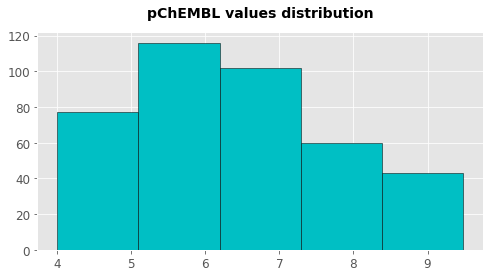

In [ ]:
# Distribution of pchembl_values
df4.pchembl_value.hist(bins=5, figsize=(8,4), color='#00BFC4', ec='black')

plt.title('pChEMBL values distribution', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'pChEMBL values distribution')

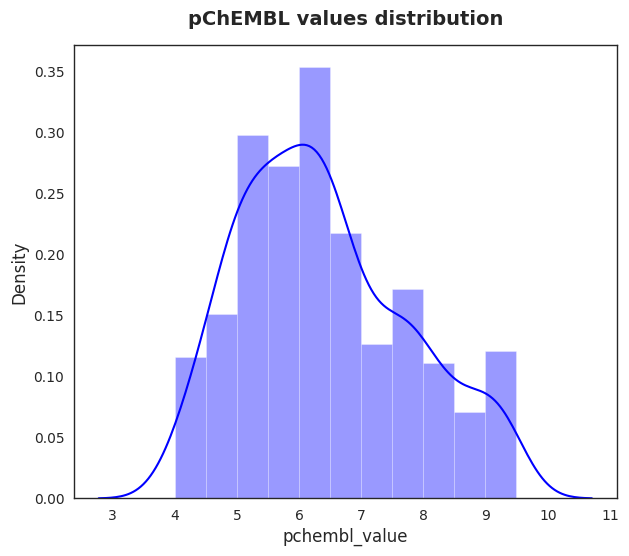

In [ ]:
import seaborn as sns
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot(df4.pchembl_value, color="blue", label="")
sns.set_style("white")
plt.title('pChEMBL values distribution', fontsize=14, fontweight='black', pad=15)

Text(0.5, 1.0, 'pChEMBL values distribution')

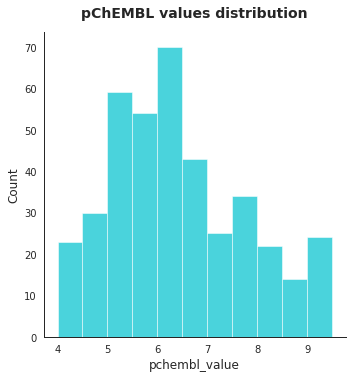

In [ ]:
from scipy.stats import norm
sns.displot(df4.pchembl_value,color='#0DC5D1')
plt.title('pChEMBL values distribution', fontsize=14, fontweight='black', pad=15)

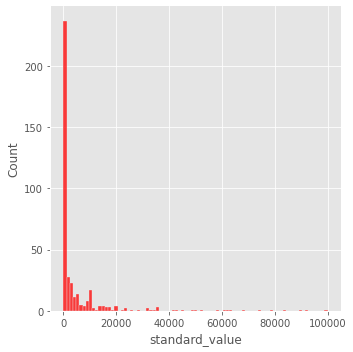

In [ ]:
#plt.figure(figsize=(10,6))
sns.displot(df4.standard_value,color='r')
#plt.title('Standard_value distribution',size=18)
#plt.xlabel('Standard value',size=20)
#plt.ylabel('Density',size=14)
#plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


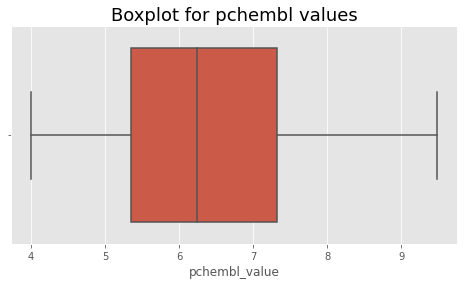

In [ ]:
plt.figure(figsize = (8,4))
sns.boxplot(df4.pchembl_value)
plt.title('Boxplot for pchembl values',size=18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


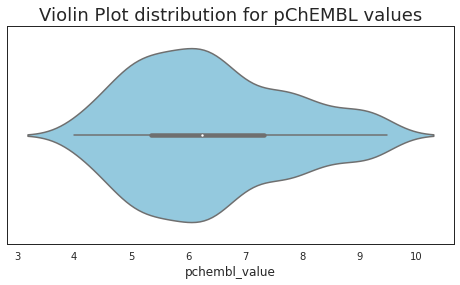

In [ ]:
plt.figure(figsize = (8,4))
sns.violinplot(df4.pchembl_value, color= 'skyblue')
plt.title('Violin Plot distribution for pChEMBL values',size=18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


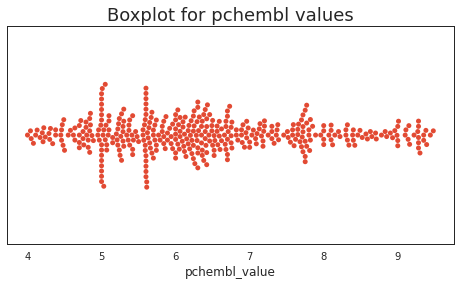

In [ ]:
plt.figure(figsize = (8,4))
sns.swarmplot(df4.pchembl_value)
plt.title('Boxplot for pchembl values',size=18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


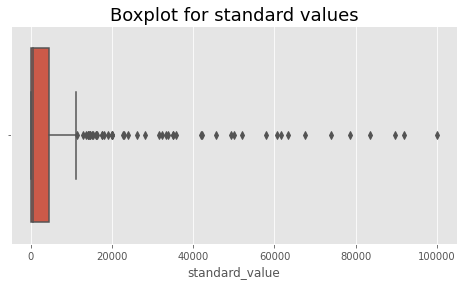

In [ ]:
plt.figure(figsize = (8,4))
sns.boxplot(df4.standard_value)
plt.title('Boxplot for standard values',size=18)
plt.show()

In [ ]:
df4.to_csv('bcr_abl_bioactivity_data_uniq_set2.csv', index=False)

In [ ]:
cp bcr_abl_bioactivity_data_uniq_set2.csv '/content/drive/MyDrive/inhibitor_prediction/bcr_abl/chembl_data_retrieve'

In [ ]:
df5 = pd.read_csv('/content/drive/MyDrive/inhibitor_prediction/bcr_abl/chembl_data_retrieve/bcr_abl_bioactivity_data_uniq_set2.csv')

In [ ]:
# Convert pchembl values to binary ones
df5["pchembl_bin"] = (df5["pchembl_value"] >= 6.3).astype(int) # 0 means inactive and 1 means active

In [ ]:
df5

,molecule_chembl_id,canonical_smiles,standard_type,standard_relation,pchembl_value,standard_value,standard_units,pchembl_bin
0,CHEMBL199723,CN1CCN(CCc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc...,IC50,=,5.02,9500.0,nM,0
1,CHEMBL381738,CN1CCN(CCCc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cn...,IC50,=,4.84,14600.0,nM,0
2,CHEMBL370800,CN1CCN(Cc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc3...,IC50,=,4.89,12900.0,nM,0
3,CHEMBL436509,CN1CCN(c2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc3O...,IC50,=,5.42,3800.0,nM,0
4,CHEMBL165,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,IC50,=,4.55,28000.0,nM,0
...,...,...,...,...,...,...,...,...
393,CHEMBL4794093,Cc1cn(-c2cc(NC(=O)c3cccc(C#Cc4cccc5[nH]nc(N)c4...,IC50,=,7.59,25.8,nM,1
394,CHEMBL4780226,CN1CCN(Cc2cc(NC(=O)c3cccc(C#Cc4cccc5[nH]nc(N)c...,IC50,=,7.25,56.7,nM,1
395,CHEMBL4794284,Nc1n[nH]c2cccc(C#Cc3cccc(C(=O)Nc4cc(CN5CCOCC5)...,IC50,=,6.24,571.0,nM,0
396,CHEMBL4786855,Nc1n[nH]c2cccc(C#Cc3cccc(C(=O)Nc4ccc(Cl)c(C(F)...,IC50,=,6.59,255.0,nM,1


In [ ]:
bioactivity_class = []
for i in df5.pchembl_value:
  if float(i) >=6.3:
    bioactivity_class.append("active")
  #elif float(i) >=10000:
    #bioactivity_class.append("inactive")
  else:
    #bioactivity_class.append("intermediate")
    bioactivity_class.append("inactive")

In [ ]:
#df_bioact = df5.copy

In [ ]:
#df_bioact

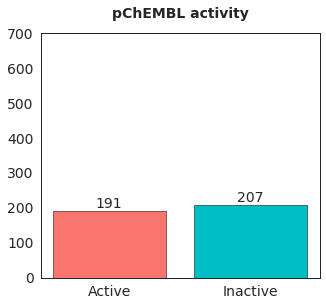

In [ ]:
# Bar plot of active and inactive molecules based on pCHEMBL values

# Data
active = len(df5[df5.pchembl_bin == 1])
inactive = len(df5[df5.pchembl_bin == 0])

x = ['Active', 'Inactive']
y = [active, inactive]

# Setup plot
fig, ax = plt.subplots()

# Make bar plot
p = ax.bar(x, y, color = ['#F8766D', '#00BFC4'], ec = 'black')

ax.set_title('pChEMBL activity', fontsize=14, fontweight='bold', pad=15)
#ax.set_xticklabels(x, fontweight='bold')

ax.set_ylim(0,700)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Label above bar
for index, data in enumerate(y):
    plt.text(x=index-0.1 , y =data+10 , s=f"{data}" , fontdict=dict(fontsize=14))

fig.set_size_inches(5,4.5)
plt.show()

In [ ]:
active = len(df5[df5.pchembl_bin == 1])
inactive = len(df5[df5.pchembl_bin == 0])

In [ ]:
active, inactive

(191, 207)

In [ ]:
# Statistical analysis | Mann-Whitney U Test
def mannwhitney(descriptor, dataset, verbose=False):

# seed the random number generator
  np.random.seed(1)

# actives and inactives
  selection = [descriptor, 'pchembl_bin']
  df = dataset[selection]
  active = df5[df5.pchembl_bin == 1]
  active = active[descriptor]

  inactive = df5[df5.pchembl_bin == 0]
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])

  return results

In [ ]:
mannwhitney('pchembl_value', df5)

,Descriptor,Statistics,p,alpha,Interpretation
0,pchembl_value,39537.0,1.287082e-66,0.05,Different distribution (reject H0)


In [ ]:
# Get rid of molecules without canonical simles
df6 = df5[df5.canonical_smiles.notnull()]

In [ ]:
df6

,molecule_chembl_id,canonical_smiles,standard_type,standard_relation,pchembl_value,standard_value,standard_units,pchembl_bin
0,CHEMBL199723,CN1CCN(CCc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc...,IC50,=,5.02,9500.0,nM,0
1,CHEMBL381738,CN1CCN(CCCc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cn...,IC50,=,4.84,14600.0,nM,0
2,CHEMBL370800,CN1CCN(Cc2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc3...,IC50,=,4.89,12900.0,nM,0
3,CHEMBL436509,CN1CCN(c2ccc(NC(=O)c3cc(-c4ccc5c(c4)OCO5)cnc3O...,IC50,=,5.42,3800.0,nM,0
4,CHEMBL165,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,IC50,=,4.55,28000.0,nM,0
...,...,...,...,...,...,...,...,...
393,CHEMBL4794093,Cc1cn(-c2cc(NC(=O)c3cccc(C#Cc4cccc5[nH]nc(N)c4...,IC50,=,7.59,25.8,nM,1
394,CHEMBL4780226,CN1CCN(Cc2cc(NC(=O)c3cccc(C#Cc4cccc5[nH]nc(N)c...,IC50,=,7.25,56.7,nM,1
395,CHEMBL4794284,Nc1n[nH]c2cccc(C#Cc3cccc(C(=O)Nc4cc(CN5CCOCC5)...,IC50,=,6.24,571.0,nM,0
396,CHEMBL4786855,Nc1n[nH]c2cccc(C#Cc3cccc(C(=O)Nc4ccc(Cl)c(C(F)...,IC50,=,6.59,255.0,nM,1


In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  398 non-null    object 
 1   canonical_smiles    398 non-null    object 
 2   standard_type       398 non-null    object 
 3   standard_relation   398 non-null    object 
 4   pchembl_value       398 non-null    float64
 5   standard_value      398 non-null    float64
 6   standard_units      398 non-null    object 
 7   pchembl_bin         398 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 28.0+ KB


In [ ]:
df6.to_csv('bcr_abl_pchembl_bin.csv', index=False)

In [ ]:
cp bcr_abl_pchembl_bin.csv '/content/drive/MyDrive/inhibitor_prediction/bcr_abl/chembl_data_retrieve'

In [ ]:
y_reg_pcehmbl_value = df6['pchembl_value']

In [ ]:
y_reg_pcehmbl_value

0      5.02
1      4.84
2      4.89
3      5.42
4      4.55
       ... 
393    7.59
394    7.25
395    6.24
396    6.59
397    6.71
Name: pchembl_value, Length: 398, dtype: float64

In [ ]:
y_reg_pcehmbl_value.to_csv('y_reg_pchembl.csv', index= False)

In [ ]:
cp y_reg_pchembl.csv '/content/drive/MyDrive/inhibitor_prediction/bcr_abl/chembl_data_retrieve'